# Decoding an ImageNet TFRecord file

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.VERSION

'1.12.0'

In [3]:
def decode(serialized_example):
    """Decode and resize"""
    features = tf.parse_single_example(
        serialized_example,
        features={
            'image/encoded': tf.FixedLenFeature([], tf.string),
            'image/class/label': tf.FixedLenFeature([], tf.int64),
        })
    image = tf.image.decode_jpeg(features['image/encoded'], channels=3)
    image = tf.image.resize_images(image, (224, 224))
    label = tf.cast(features['image/class/label'], tf.int64)
    #label = tf.one_hot(label, 1000)
    return image, label

In [4]:
dataset = tf.data.TFRecordDataset('train-00001-of-01024')
dataset = dataset.map(decode)
dataset = dataset.batch(1)
iterator = dataset.make_one_shot_iterator()
next_item = iterator.get_next()

In [5]:
# Loop over the dataset to see how many images and how many classes are there
counter = []
with tf.train.MonitoredTrainingSession() as sess:
    while sess.should_stop:
        image, label = sess.run(next_item)
        counter.append(label)
        
print(max(counter))
print(min(counter))
print(len(counter))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[1000]
[1]
1251


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


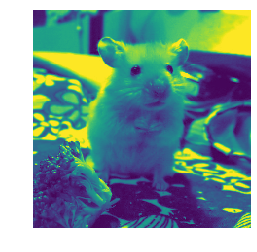

In [6]:
# Visualize one image and check it was recovered correctly
with tf.train.MonitoredTrainingSession() as sess:
    for i in range(102):
        image, label = sess.run(next_item)

plt.imshow(image[0, :, :, 1])
plt.axis('off')
plt.show()